### Import Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

import warnings

try:
    from xgboost import XGBRegressor, XGBClassifier
    HAS_XGBOOST = True
except Exception:
    HAS_XGBOOST = False

try:
    import shap
    HAS_SHAP = True
except ImportError:
    HAS_SHAP = False


sns.set_style("whitegrid")

warnings.filterwarnings('ignore')

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)


from src.eda_preprocessing import EDADataPreprocessor
from src.modeling import ModelHelper
from src.prep_modeling import DataPrepHelper



c:\Users\amare\Documents\KAIM\week-3\insurance_analytics\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Loading

In [2]:
DATA_FILE_PATH = '../data/MachineLearningRating_v3_cleaned.txt'
DELIMITER = '|'

loader = EDADataPreprocessor(DATA_FILE_PATH, DELIMITER)
df = loader.load_data()
df = loader.convert_types()

Loaded: 1000024 rows, 50 columns
Converted 'TransactionMonth' to datetime.
Converted 'VehicleIntroDate' to datetime.


### Basic Dataset Information

In [3]:
# Basic info
df.info()

# Check missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing[missing > 0])

# Quick stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000024 entries, 0 to 1000023
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000024 non-null  int64         
 1   PolicyID                  1000024 non-null  int64         
 2   TransactionMonth          1000024 non-null  datetime64[ns]
 3   IsVATRegistered           1000024 non-null  bool          
 4   Citizenship               1000024 non-null  object        
 5   LegalType                 1000024 non-null  object        
 6   Title                     1000024 non-null  object        
 7   Language                  1000024 non-null  object        
 8   Bank                      854063 non-null   object        
 9   AccountType               959792 non-null   object        
 10  MaritalStatus             991765 non-null   object        
 11  Gender                    990488 non-null   object

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000024e+06,1.000024e+06,1000024,1.000024e+06,9.994720e+05,1.000024e+06,999472.000000,999472.000000,999472.000000,999472.000000,0,2.203860e+05,1.000024e+06,1.000024e+06,1.000024e+06,1.000024e+06
mean,1.048156e+05,7.956455e+03,2015-02-28 10:42:46.824796928,3.020286e+03,5.487732e+07,2.010226e+03,4.046646,2466.726433,97.206898,4.019251,NaT,2.255720e+05,6.041773e+05,1.178776e+02,6.191003e+01,6.486599e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,NaT,2.000000e+04,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514100e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,NaT,1.351000e+05,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408000e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,NaT,2.200000e+05,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391910e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,NaT,2.800000e+05,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,NaT,2.655000e+07,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329558e+04,5.290155e+03,NaN,2.649677e+03,1.360424e+07,3.261314e+00,0.294031,442.812714,19.393610,0.468332,NaN,5.646007e+05,1.508336e+06,3.997141e+02,2.302924e+02,2.384163e+03


### Initialize Model Helpers and Data Preparation Helpers

In [4]:
# Data prep helper (for feature engineering, encoding, etc.)
data_helper = DataPrepHelper(current_year=2015)

# Model helper (for training and evaluation)
model_helper = ModelHelper()


### Data Preparation

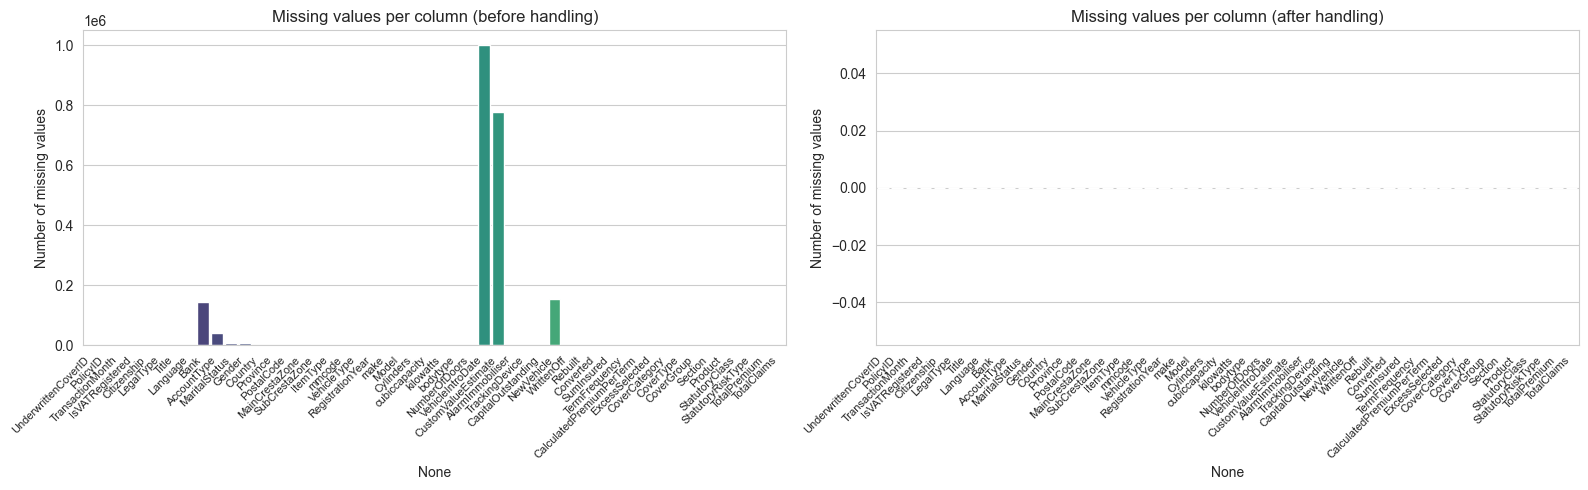

In [5]:

# Count missing values per column
missing_before = df.isna().sum()
df_clean = data_helper.handle_missing_values(df)
missing_after = df_clean.isna().sum()

# Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Before handling
sns.barplot(x=missing_before.index, y=missing_before.values, palette="viridis", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right", fontsize=8)
axes[0].set_ylabel("Number of missing values", fontsize=10)
axes[0].set_title("Missing values per column (before handling)", fontsize=12)

# After handling
sns.barplot(x=missing_after.index, y=missing_after.values, palette="magma", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right", fontsize=8)
axes[1].set_ylabel("Number of missing values", fontsize=10)
axes[1].set_title("Missing values per column (after handling)", fontsize=12)

plt.tight_layout()
plt.show()


In [6]:
# Apply feature selection
df_features = data_helper.select_features(df_clean)

# Compare columns before and after
print("Columns before selection:", df_clean.columns.tolist())
print("Columns after selection:", df_features.columns.tolist())

# Number of columns dropped
dropped_cols = set(df_clean.columns) - set(df_features.columns)
print("Dropped columns:", dropped_cols)

# Shape for reference
print("Shape after feature selection:", df_features.shape)


Columns before selection: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
Columns after selection: ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone'

In [7]:
df_features = data_helper.create_features(df_features)
df_features.head()
print(df_features.columns)


Index(['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'vehicle_age',
       'premium_per_sum_insured'],
      dtype='object')


In [8]:
df_encoded, encoders = data_helper.encode_categoricals(df_features)
print(f"Encoded {len(encoders)} categorical columns")

print('Prepared data sample:', df_encoded.shape)



Encoded 32 categorical columns
Prepared data sample: (1000024, 45)


### ML Preparation 

This prepares the dataset for predicting claim amounts (regression) and predicting whether a claim occurs (classification). It splits the data into training and test sets for both tasks and prints the size of each set along with the claim rate in the test set. Regression predicts numeric values, while classification predicts yes/no outcomes.

In [9]:
# Regression (Claim Severity: TotalClaims > 0)
X_train_sev, X_test_sev, y_train_sev, y_test_sev = data_helper.prepare_severity_data(df_encoded, test_size=0.2, random_state=42)

# Classification (Has Claim: has_claim)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = data_helper.prepare_classification_data(df_encoded, test_size=0.2, random_state=42)

print(f"Severity training set: {len(X_train_sev):,} rows")
print(f"Severity test set: {len(X_test_sev):,} rows")

print(f"Classification training set: {len(X_train_clf):,} rows")
print(f"Classification test set: {len(X_test_clf):,} rows")
print(f"Claim rate in test set: {y_test_clf.mean():.2%}")


Severity training set: 2,230 rows
Severity test set: 558 rows
Classification training set: 800,019 rows
Classification test set: 200,005 rows
Claim rate in test set: 0.28%


### Training Regression Models for Claim Severity

This trains three different regression models to predict claim amounts (claim severity) using the training data. It first trains a Linear Regression model, then a Random Forest Regressor with 50 trees, and optionally trains an XGBoost Regressor with 50 trees if the XGBoost library is installed. These models can later be evaluated to compare their performance in predicting numeric claim values.

In [10]:
# Linear Regression
lr_model = model_helper.train_linear_regression(X_train_sev, y_train_sev)

# Random Forest Regressor
rf_model = model_helper.train_random_forest_regressor(X_train_sev, y_train_sev, n_estimators=50)

# Optional: XGBoost Regressor (if installed)
if HAS_XGBOOST:
    xgb_model = model_helper.train_xgboost_regressor(X_train_sev, y_train_sev, n_estimators=50)


### Regression Model Predictions and Evaluation

This code evaluates the regression models trained to predict claim severity.

Predictions and Evaluation: Each model (Linear Regression, Random Forest, and optionally XGBoost) predicts claim amounts on the test set, and evaluation metrics (e.g., RMSE, R²) are calculated.

Results Summary: The evaluation scores are combined into a DataFrame for easy comparison across models.

Visualization – Bar Chart: A bar chart compares the models based on their evaluation metrics.

Visualization – Scatter Plots: Scatter plots show actual vs. predicted values for each model, with a reference line y=x to indicate perfect predictions. This helps visually assess model accuracy and potential prediction biases.

In short, this section compares model performance numerically and visually to determine which regression model best predicts claim amounts.

,rmse,r2
LinearRegression,33551.099621,0.300061
RandomForest,35493.377106,0.216676
XGBoost,35776.096232,0.204147


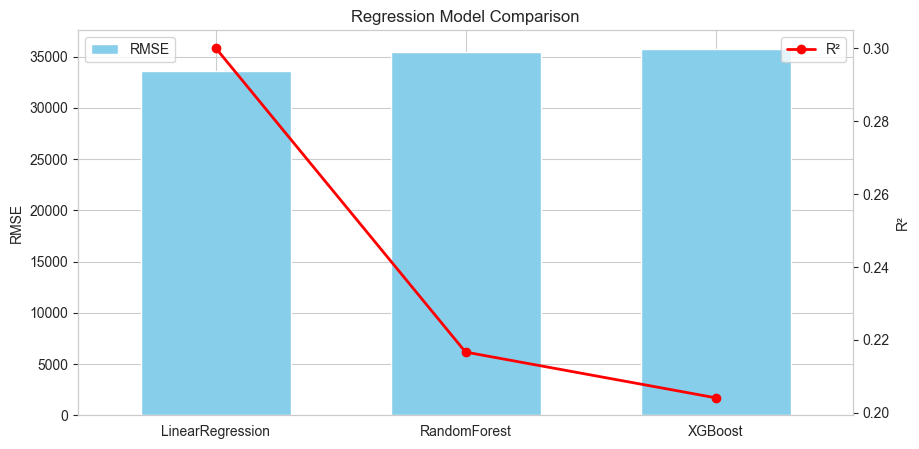

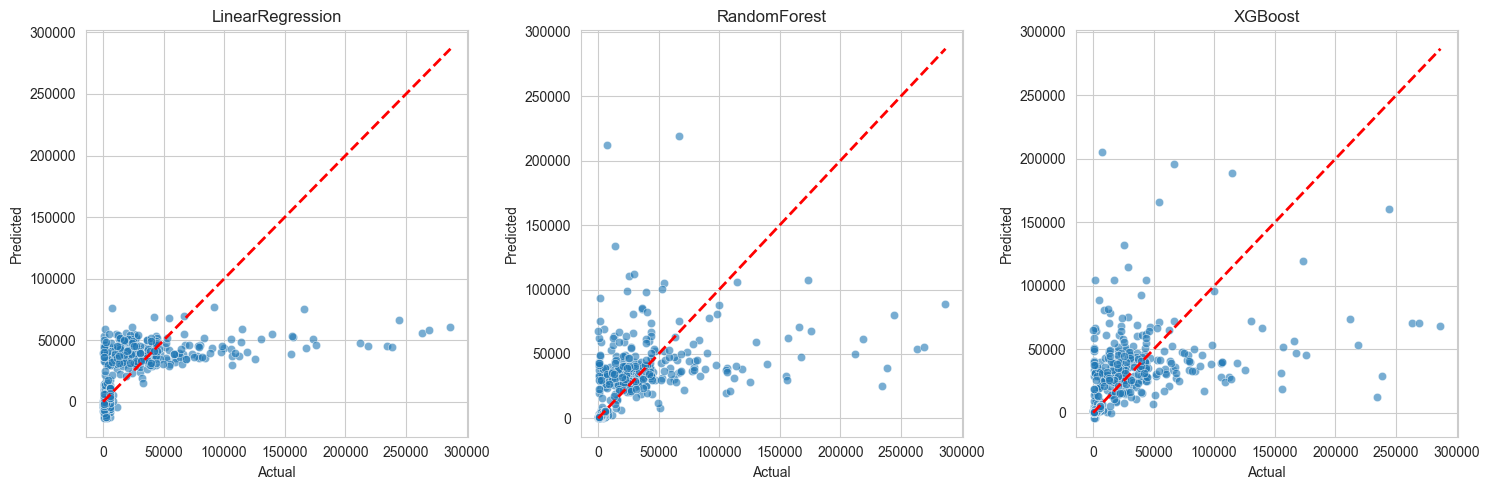

In [11]:
# --- 1️⃣ Predictions and evaluations ---

# Linear Regression
y_pred_lr = lr_model.predict(X_test_sev)
eval_lr = model_helper.evaluate_regression(y_test_sev, y_pred_lr)

# Random Forest
y_pred_rf = rf_model.predict(X_test_sev)
eval_rf = model_helper.evaluate_regression(y_test_sev, y_pred_rf)

# XGBoost
if HAS_XGBOOST:
    y_pred_xgb = xgb_model.predict(X_test_sev)
    eval_xgb = model_helper.evaluate_regression(y_test_sev, y_pred_xgb)

# --- 2️⃣ Combine results into a DataFrame ---
reg_results = pd.DataFrame(
    [eval_lr, eval_rf] + ([eval_xgb] if HAS_XGBOOST else []),
    index=["LinearRegression", "RandomForest"] + (["XGBoost"] if HAS_XGBOOST else [])
)

display(reg_results)


# --- 3️⃣ Bar chart of evaluation metrics ---

# Plot RMSE as bars
ax = reg_results['rmse'].plot(kind='bar', figsize=(10,5), color='skyblue', width=0.6)
ax.set_ylabel("RMSE")
ax.set_xticklabels(reg_results.index, rotation=0)
ax.set_title("Regression Model Comparison")

# Plot R² as a line on a secondary y-axis
reg_results['r2'].plot(kind='line', marker='o', color='red', linewidth=2, secondary_y=True, ax=ax)
ax.right_ax.set_ylabel("R²")

# Add legend
ax.legend(["RMSE"], loc='upper left')
ax.right_ax.legend(["R²"], loc='upper right')

plt.show()


# --- 4️⃣ Scatter plots of actual vs predicted ---
models = {"LinearRegression": y_pred_lr, "RandomForest": y_pred_rf}
if HAS_XGBOOST:
    models["XGBoost"] = y_pred_xgb

plt.figure(figsize=(15,5))
for i, (name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, len(models), i)
    sns.scatterplot(x=y_test_sev, y=y_pred, alpha=0.6)
    plt.plot([y_test_sev.min(), y_test_sev.max()],
             [y_test_sev.min(), y_test_sev.max()],
             'r--', lw=2)  # reference line y=x
    plt.title(name)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


The regression results show that Linear Regression performed slightly better than the tree-based models, with the lowest RMSE and highest R². Overall, all models have modest performance, indicating that the current features only partially explain claim amounts. Tree-based models like Random Forest and XGBoost did not improve predictions, suggesting the relationship between features and claim severity may be mostly linear or that additional informative features are needed.

### Training Classification Models for Claim Prediction

This trains machine learning models to predict whether a claim occurs (classification task). It first trains a Random Forest Classifier using the training data, and optionally trains an XGBoost Classifier if the XGBoost library is installed. These models can later be evaluated to compare their performance in predicting yes/no outcomes for claims.

In [12]:

# Random Forest Classifier
clf_rf = model_helper.train_random_forest_classifier(X_train_clf, y_train_clf)

# Optional XGBoost Classifier
if HAS_XGBOOST:
    clf_xgb = model_helper.train_xgboost_classifier(X_train_clf, y_train_clf)


### Classification Model Evaluation and Comparison

This code evaluates the performance of classification models predicting whether a claim occurs.

Metric Calculation: It defines a function get_metrics to compute Accuracy, Precision, Recall, and F1 Score for any model.

Random Forest Evaluation: Predicts on the test set and calculates the metrics.

Optional XGBoost Evaluation: If XGBoost is installed, it also predicts and computes metrics for that model.

Visualization: Combines the metrics into a DataFrame and plots them as a bar chart, allowing an easy comparison of model performance across all metrics.

Random Forest Metrics: {'Accuracy': 0.9971250718732032, 'Precision': 0.038461538461538464, 'Recall': 0.0018148820326678765, 'F1 Score': 0.0034662045060658577}
XGBoost Metrics: {'Accuracy': 0.9972350691232719, 'Precision': 0.25, 'Recall': 0.0018148820326678765, 'F1 Score': 0.0036036036036036037}


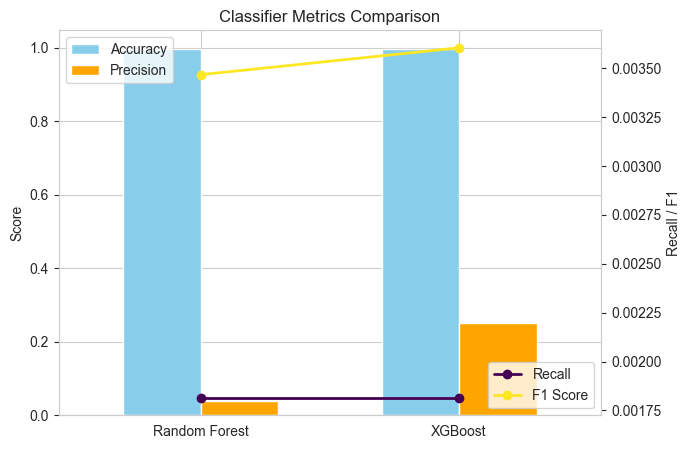

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# --- Compute metrics function ---
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0)
    }

# --- Random Forest predictions and metrics ---
y_pred_clf_rf = clf_rf.predict(X_test_clf)
metrics_rf = get_metrics(y_test_clf, y_pred_clf_rf)
print("Random Forest Metrics:", metrics_rf)

# --- Optional XGBoost predictions and metrics ---
metrics_list = [metrics_rf]
model_names = ["Random Forest"]

if HAS_XGBOOST:
    y_pred_clf_xgb = clf_xgb.predict(X_test_clf)
    metrics_xgb = get_metrics(y_test_clf, y_pred_clf_xgb)
    print("XGBoost Metrics:", metrics_xgb)
    metrics_list.append(metrics_xgb)
    model_names.append("XGBoost")

# --- Plot metrics ---
metrics_df = pd.DataFrame(metrics_list, index=model_names)
fig, ax = plt.subplots(figsize=(7,5))

# Plot Accuracy and Precision as bars
metrics_df[['Accuracy', 'Precision']].plot(kind='bar', color=['skyblue','orange'], width=0.6, ax=ax)
ax.set_ylabel("Score")
ax.set_xticklabels(metrics_df.index, rotation=0)
ax.set_title("Classifier Metrics Comparison")

# Plot Recall and F1 on secondary y-axis
metrics_df[['Recall', 'F1 Score']].plot(kind='line', marker='o', linewidth=2,
                                       ax=ax, secondary_y=True, colormap="viridis")
ax.right_ax.set_ylabel("Recall / F1")
ax.legend(['Accuracy', 'Precision'], loc='upper left')
ax.right_ax.legend(['Recall', 'F1 Score'], loc='lower right')

plt.show()


Both models show very high accuracy (~99.7%) due to the imbalanced dataset, but they perform poorly on actual claims. Recall is extremely low (~0.18%), meaning most claims are missed, and F1 scores are near zero. XGBoost has slightly better precision, but overall, both models struggle to detect positive claims, highlighting the need for techniques to handle class imbalance.

### Feature Importance

#### 1. Random Forest Regressor / Classifier

This code visualizes the most important features for the Random Forest models in both regression and classification tasks.

Regression: It extracts and plots the top 10 features influencing claim severity predictions (Random Forest Regressor) using a green color palette.

Classification: It extracts and plots the top 10 features influencing claim occurrence predictions (Random Forest Classifier) using a blue color palette.

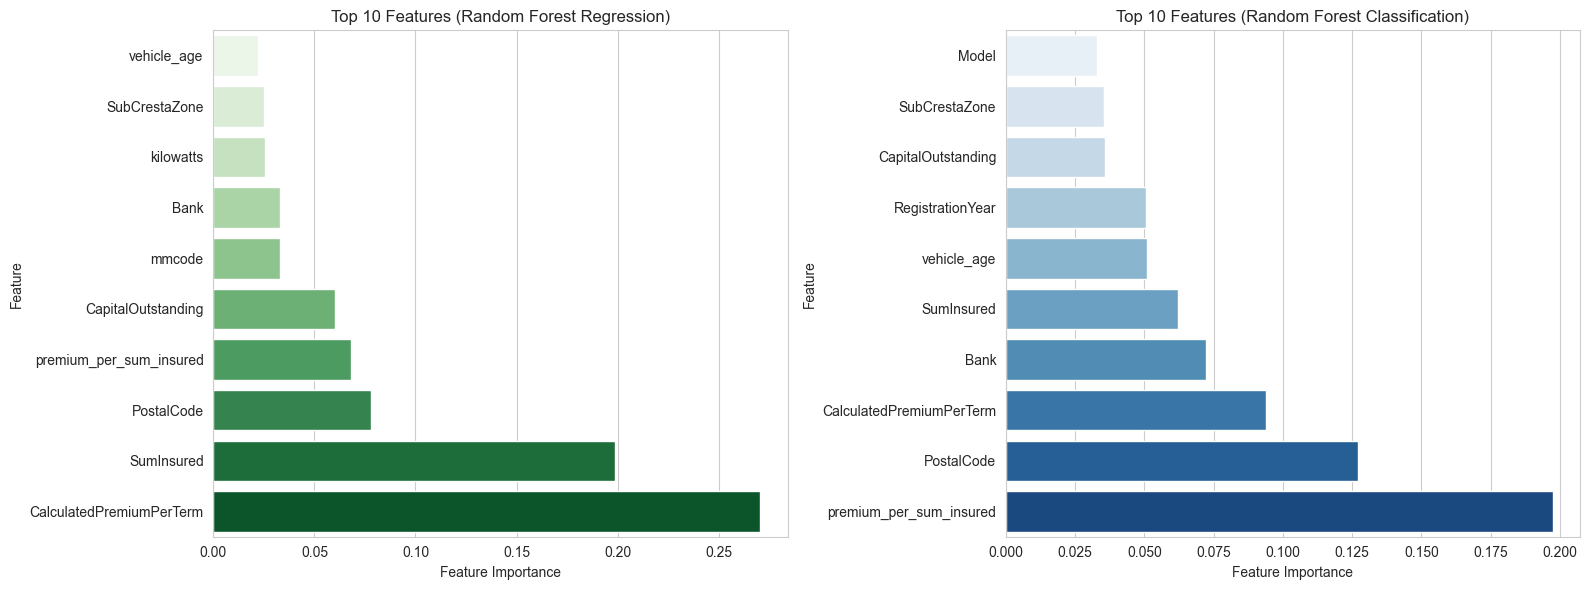

In [14]:


# Random Forest Regression
feat_imp_rf_reg = model_helper.get_feature_importance(rf_model, X_train_sev.columns)
top_reg = feat_imp_rf_reg.head(10).sort_values("importance", ascending=True)  # for horizontal bars

# Random Forest Classification
feat_imp_rf_clf = model_helper.get_feature_importance(clf_rf, X_train_clf.columns)
top_clf = feat_imp_rf_clf.head(10).sort_values("importance", ascending=True)

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Regression plot
sns.barplot(data=top_reg, x="importance", y="feature", palette="Greens", ax=axes[0])
axes[0].set_title("Top 10 Features (Random Forest Regression)")
axes[0].set_xlabel("Feature Importance")
axes[0].set_ylabel("Feature")

# Classification plot
sns.barplot(data=top_clf, x="importance", y="feature", palette="Blues", ax=axes[1])
axes[1].set_title("Top 10 Features (Random Forest Classification)")
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Feature")

plt.tight_layout()
plt.show()


#### 2. XGBoost Regressor / Classifier

This code visualizes the most important features for XGBoost in both regression and classification tasks.

Regression: It extracts and plots the top 10 features influencing claim severity predictions (Random Forest Regressor) using a green color palette.

Classification: It extracts and plots the top 10 features influencing claim occurrence predictions (Random Forest Classifier) using a blue color palette.

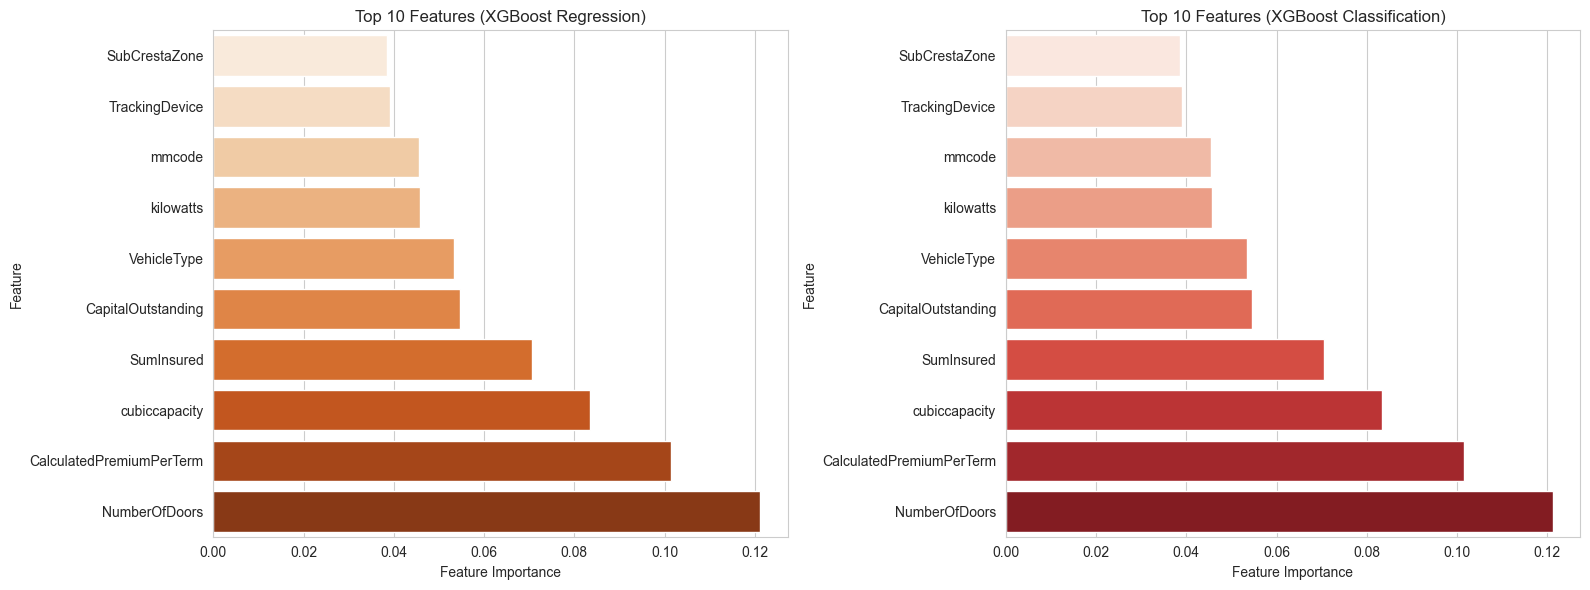

In [15]:
#### 2. XGBoost Regressor / Classifier Feature Importance (Side-by-Side)

if HAS_XGBOOST:
 

    # XGBoost Regression
    feat_imp_xgb_reg = model_helper.get_feature_importance(xgb_model, X_train_sev.columns)
    top_xgb_reg = feat_imp_xgb_reg.head(10).sort_values("importance", ascending=True)

    # XGBoost Classification
    feat_imp_xgb_clf = model_helper.get_feature_importance(xgb_model, X_train_clf.columns)
    top_xgb_clf = feat_imp_xgb_clf.head(10).sort_values("importance", ascending=True)

    # Create side-by-side subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

    # Regression plot
    sns.barplot(data=top_xgb_reg, x="importance", y="feature", palette="Oranges", ax=axes[0])
    axes[0].set_title("Top 10 Features (XGBoost Regression)")
    axes[0].set_xlabel("Feature Importance")
    axes[0].set_ylabel("Feature")

    # Classification plot
    sns.barplot(data=top_xgb_clf, x="importance", y="feature", palette="Reds", ax=axes[1])
    axes[1].set_title("Top 10 Features (XGBoost Classification)")
    axes[1].set_xlabel("Feature Importance")
    axes[1].set_ylabel("Feature")

    plt.tight_layout()
    plt.show()


#### 3. Feature Importance for Linear Regression

Linear Regression does not provide built-in feature importance like tree-based models. Instead, the absolute values of the model coefficients can be used as a proxy to measure the influence of each feature on the prediction. This code extracts the coefficients from the trained Linear Regression model, takes their absolute values, and plots the top features to visualize which inputs have the most impact on predicting claim severity.

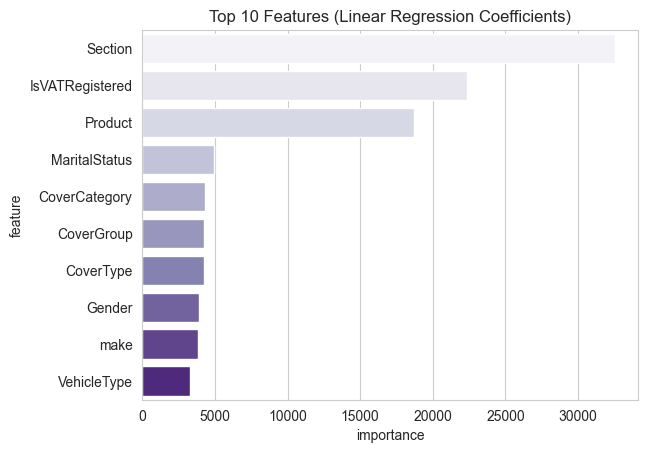

In [16]:
feat_imp_lr = pd.DataFrame({
    "feature": X_train_sev.columns,
    "importance": abs(lr_model.coef_)
}).sort_values("importance", ascending=False)

sns.barplot(data=feat_imp_lr.head(10), x="importance", y="feature", palette="Purples")
plt.title("Top 10 Features (Linear Regression Coefficients)")
plt.show()


### SHAP Analysis for Random Forest Regression

This code uses SHAP (SHapley Additive exPlanations) to interpret the Random Forest model’s predictions for claim severity.

A TreeExplainer is created for the trained Random Forest model, and SHAP values are computed on the test set.

The bar summary plot shows the top 10 features ranked by their overall impact on model predictions.

The dot summary plot provides a detailed view of how each feature’s values influence predictions across all samples.

These visualizations help understand which features drive the model’s predictions and the direction of their effects.

 96%|=================== | 534/558 [00:20<00:00]       

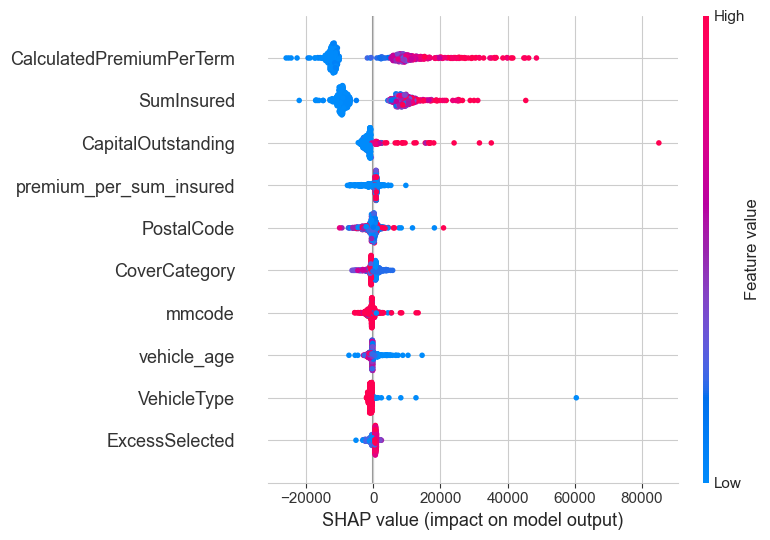

In [17]:
# Compute and visualize SHAP values
shap_values = model_helper.explain_model_shap(
    model=rf_model,         
    X=X_test_sev,
    feature_names=X_test_sev.columns.tolist(),
    max_display=10,
    plot_type="summary",      # can be "summary", "bar"
)


 94%|=================== | 527/558 [00:18<00:01]       

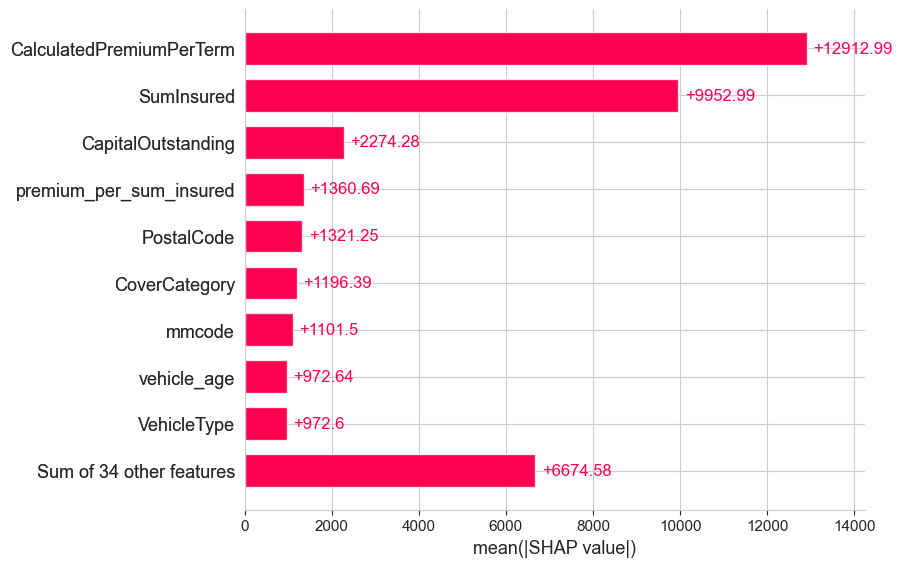

In [18]:
# Compute and visualize SHAP values
shap_values = model_helper.explain_model_shap(
    model=rf_model,         
    X=X_test_sev,
    feature_names=X_test_sev.columns.tolist(),
    max_display=10,
    plot_type="bar",      # can be "summary", "bar"
)


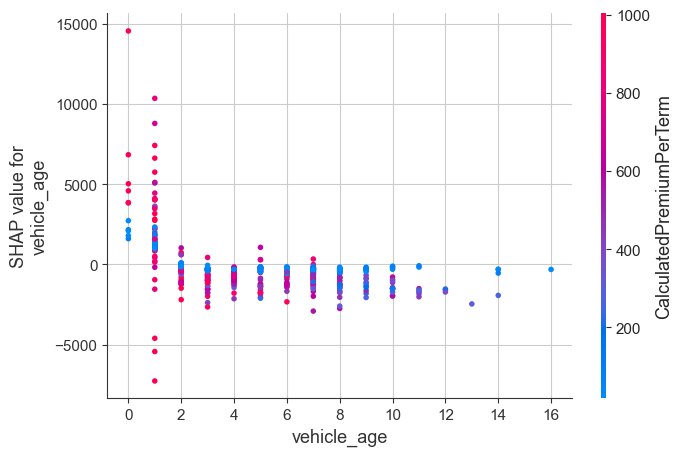

In [19]:
model_helper.shap_dependence_plot(rf_model, X_test_sev, feature="vehicle_age", shap_values=shap_values)

In [20]:
comparison_df = model_helper.compare_models(X_test_sev, y_test_sev, task="regression")
print(comparison_df)

           rmse        r2                   model
0  33551.099621  0.300061        LinearRegression
1  35493.377106  0.216676   RandomForestRegressor
2  35776.096232  0.204147            XGBRegressor
3  46362.212091 -0.336519  RandomForestClassifier
4  46362.235228 -0.336521           XGBClassifier


In [21]:

comparison_df = model_helper.compare_models(X_test_clf, y_test_clf, task="classification")
print(comparison_df)


   accuracy  precision    recall        f1                   model
4  0.997235   0.250000  0.001815  0.003604           XGBClassifier
3  0.997125   0.038462  0.001815  0.003466  RandomForestClassifier
0  0.152371   0.002819  0.869328  0.005619        LinearRegression
2  0.092268   0.002998  0.990926  0.005979            XGBRegressor
1  0.002755   0.002755  1.000000  0.005495   RandomForestRegressor


### Insights and Recommendations

The data shows a significant imbalance, with only 0.28% of customers filing a claim. Because of this, the classification models achieve very high accuracy simply by predicting “no claim” for almost everyone, which makes them unreliable for identifying actual risk. The regression models perform slightly better, explaining about 20–30% of the factors that drive claim amounts. Key predictors include the insured value, premium, outstanding loan amount, and vehicle age, but missing information—especially in fields like CustomValueEstimate—reduces the models’ ability to understand higher-value or modified vehicles. Overall, the data captures some important patterns, but not enough to fully describe claim behavior.

To improve the usefulness of the models, the imbalance issue must be addressed through methods such as SMOTE, class weighting, or undersampling. For pricing, it is currently more practical to group customers into risk categories rather than rely on individual model outputs. Strengthening data collection processes and supplementing existing data with external information—such as location-based risk or driving behavior—would help fill the gaps, since the present dataset explains only part of the underlying risk. With these adjustments, the models could provide more reliable support for underwriting and pricing decisions.
